In [2]:
import pandas as pd

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_excel("BDVigas_Paper_v32.xlsx",sheet_name="Sheet1")
df

,b (mm),fc (MPa),Mu (Kn.m),p_opt,R_opt,d_opt (cm),As (cm^2)
0,200,21,100,0.009954,0.523773,39.039718,7.771727
1,200,28,100,0.010563,0.501796,37.401701,7.901683
2,200,35,100,0.010966,0.488321,36.397314,7.982857
3,200,21,100,0.009954,0.523773,39.039718,7.771727
4,200,28,100,0.010563,0.501796,37.401701,7.901683
...,...,...,...,...,...,...,...
359995,400,28,2000,0.010563,0.501796,118.274563,49.974630
359996,400,35,2000,0.010966,0.488321,115.098414,50.488020
359997,400,21,2000,0.009954,0.523773,123.454427,49.152717
359998,400,28,2000,0.010563,0.501796,118.274563,49.974630


In [5]:
y = df["d_opt (cm)"]
x = df[["b (mm)", "fc (MPa)","Mu (Kn.m)"]]

In [6]:
y

0          39.039718
1          37.401701
2          36.397314
3          39.039718
4          37.401701
             ...    
359995    118.274563
359996    115.098414
359997    123.454427
359998    118.274563
359999    115.098414
Name: d_opt (cm), Length: 360000, dtype: float64

In [7]:
x

,b (mm),fc (MPa),Mu (Kn.m)
0,200,21,100
1,200,28,100
2,200,35,100
3,200,21,100
4,200,28,100
...,...,...,...
359995,400,28,2000
359996,400,35,2000
359997,400,21,2000
359998,400,28,2000


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [10]:
xtrain

,b (mm),fc (MPa),Mu (Kn.m)
38851,200,28,300
202132,325,28,1200
133525,275,28,800
339880,400,28,1900
137309,275,35,800
...,...,...,...
117583,250,28,700
73349,225,35,500
312201,375,21,1800
267336,350,21,1500


In [11]:
ytrain

38851      64.781646
202132    101.637808
133525     90.216297
339880    115.279784
137309     87.793625
             ...    
117583     88.508578
73349      76.732276
312201    120.960141
267336    114.296590
128037     94.167342
Name: d_opt (cm), Length: 288000, dtype: float64

In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense( 40, activation = "relu", input_shape=(xtrain.shape[1],) ),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 1 )
])

c:\Users\josga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,761 (26.41 KB)

 Trainable params: 6,761 (26.41 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
def RMSE(y_true,y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [16]:
# Compilar el modelo
model.compile(optimizer="adam",
    loss=RMSE
)

In [17]:
# Entrenando el modelo
model.fit(xtrain, ytrain, epochs = 20, verbose = True)

Epoch 1/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - loss: 5.5430
Epoch 2/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 4.0264
Epoch 3/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 3.4542
Epoch 4/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - loss: 2.6511
Epoch 5/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.7475
Epoch 6/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - loss: 0.5481
Epoch 7/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 0.4448
Epoch 8/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - loss: 0.4199
Epoch 9/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.3996
Epoch 10/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3656
Epoch 11/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3411
Epoch 12/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.3570
Epoch 13/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.3825
Epoch 14/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.3149
Epoch 15/20
900

<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
C:\Users\josga\AppData\Local\Temp\ipykernel_11544\138317372.py:24: SyntaxWarning: invalid escape sequence '\c'
  plt.text(90, 70, f'$y = {m[0]:.2f} \cdot x + {b[0]:.2f}$', fontsize=10)


9000/9000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
MSE: 0.01755843368495591
RMSE: 0.13250824006436698


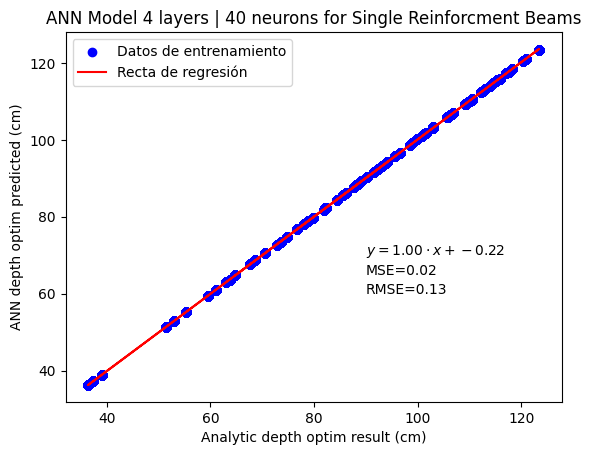

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculamos las predicciones del modelo
y_pred = model.predict(xtrain)

# Calculamos el MSE
mse = mean_squared_error(ytrain, y_pred)
print("MSE:", mse)

# Calculamos el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain, y_pred, 1)

# Ploteo de resultados
plt.scatter(ytrain, y_pred, color='blue', label='Datos de entrenamiento')
plt.plot(ytrain, m*ytrain + b, color='red', label='Recta de regresión')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(90, 70, f'$y = {m[0]:.2f} \cdot x + {b[0]:.2f}$', fontsize=10)
plt.text(90, 65, f'MSE={mse:.2f}', fontsize=10)
plt.text(90, 60, f'RMSE={rmse:.2f}', fontsize=10)

plt.xlabel("Analytic depth optim result (cm)")
plt.ylabel("ANN depth optim predicted (cm)")
plt.title("ANN Model 4 layers | 40 neurons for Single Reinforcment Beams")
plt.legend()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x22b21b1a2a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22b21b1a8a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b21b1a030>],
 'medians': [<matplotlib.lines.Line2D at 0x22b21b1ae70>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b21b1b1a0>],
 'means': []}

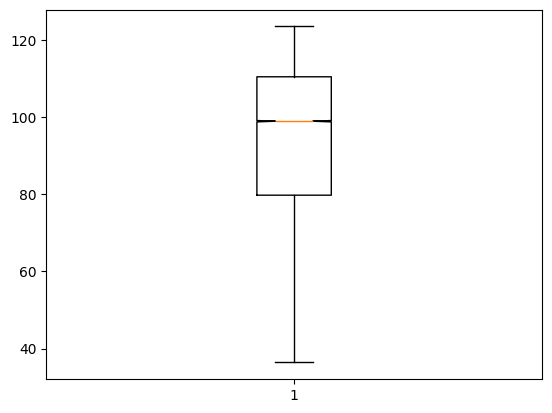

In [19]:
plt.boxplot(ytest,"o")

In [20]:
#Datos de ETABS
b = [550] #Base de la Viga (mm)
fc = [31] #Resistencia a la compresión del concreto (MPa)
Mu = [2500] #Momento Último (kN.m)

#Almacenamiento de datos del ETABS
data_Etabs = pd.DataFrame()
data_Etabs['b (mm)'] = b
data_Etabs['fc (MPa)'] = fc
data_Etabs['Mu (Kn.m)'] = Mu

#Evaluación en el Modelo entrenado por ANN
y_d = model.predict(data_Etabs)

imprimir = f"El peralte efectivo (d) es {y_d} cm"
print(imprimir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
El peralte efectivo (d) es [[114.19244]] cm
